In [51]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
import seaborn as sns

%matplotlib inline

# about dataset
This dataset is about past loans. The Loan_train.csv data set includes details of 346 customers whose loan are already paid off or defaulted.

##data exploration plan
1.data overview 2.data cleaning and feature engineering

i put the link for you to download it https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

In [52]:
data=pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv')
data.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      346 non-null    int64 
 1   Unnamed: 0.1    346 non-null    int64 
 2   loan_status     346 non-null    object
 3   Principal       346 non-null    int64 
 4   terms           346 non-null    int64 
 5   effective_date  346 non-null    object
 6   due_date        346 non-null    object
 7   age             346 non-null    int64 
 8   education       346 non-null    object
 9   Gender          346 non-null    object
dtypes: int64(5), object(5)
memory usage: 27.2+ KB


In [54]:
data.shape

(346, 10)

we have no missing data here but if we had we could use sklearn somthing like this from sklearn.impute import KNNImputer imputer = KNNImputer(n_neighbors=2, weights="uniform") for i in range(0,10): df_c=df.iloc[:,i:] df_c=imputer.fit_transform(df_c) df.iloc[:, i:]=df_c

In [55]:
data['due_date']=pd.to_datetime(data['due_date'])
data['effective_date']=pd.to_datetime(data['effective_date'])
data.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# data visualizastion and preprocessing

In [56]:
data['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

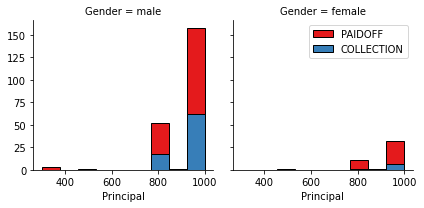

In [57]:
bins = np.linspace(data.Principal.min(), data.Principal.max(), 10)
g = sns.FacetGrid(data, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

this means 260 people paid the loan while 
86 gone into collection

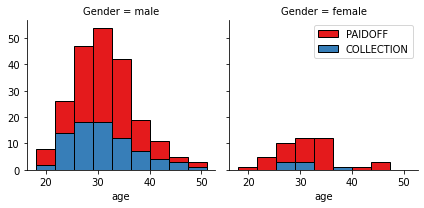

In [58]:
bins = np.linspace(data.age.min(), data.age.max(), 10)
g = sns.FacetGrid(data, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

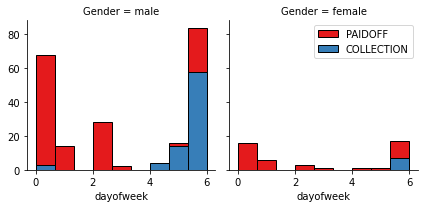

In [59]:
data['dayofweek'] = data['effective_date'].dt.dayofweek
bins = np.linspace(data.dayofweek.min(), data.dayofweek.max(), 10)
g = sns.FacetGrid(data, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

so its visible that loans given at the end of the week are less likley to get paid off
we use Feature binarization to set a threshold values less then day 4

In [60]:
data['weekend'] = data['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
data.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


In [61]:
data.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

In [62]:
data['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
data.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [63]:
data['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[1,0],inplace=True)
data.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,1,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,1,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,1,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,1,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,1,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [64]:
mask = data.dtypes == object
categorical_cols=data.columns[mask]

In [65]:
num_ohc_cols = (data[categorical_cols]
                .apply(lambda x: x.nunique())
                .sort_values(ascending=False))
num_ohc_cols

education    4
dtype: int64

In [66]:
from sklearn.preprocessing import OneHotEncoder

In [67]:
data_ohc=data.copy()
ohc=OneHotEncoder()
for col in num_ohc_cols.index:
  new_dat = ohc.fit_transform(data_ohc[[col]])
  data_ohc = data_ohc.drop(col, axis=1)
  cats = ohc.categories_
  new_cols = ['_'.join([col,cat]) for cat in cats[0]]
  new_df = pd.DataFrame(new_dat.toarray(), columns=new_cols)
  data_ohc = pd.concat([data_ohc, new_df], axis=1)

In [68]:
data_ohc.shape[1] - data.shape[1]

3

In [69]:
print(data.shape[1])

data = data.drop(num_ohc_cols.index, axis=1)

print(data.shape[1])

12
11


In [70]:
y_col="loan_status"
X=data_ohc.drop(y_col,axis=1)
y = data[y_col]

# linear regression
here i will learn 3 models on this data set to predict our

In [71]:
data_ohc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Unnamed: 0                      346 non-null    int64         
 1   Unnamed: 0.1                    346 non-null    int64         
 2   loan_status                     346 non-null    int64         
 3   Principal                       346 non-null    int64         
 4   terms                           346 non-null    int64         
 5   effective_date                  346 non-null    datetime64[ns]
 6   due_date                        346 non-null    datetime64[ns]
 7   age                             346 non-null    int64         
 8   Gender                          346 non-null    int64         
 9   dayofweek                       346 non-null    int64         
 10  weekend                         346 non-null    int64         
 11  educat

In [72]:
data_ohc=data_ohc.drop(['effective_date','due_date'],axis=1)

In [73]:
from sklearn.model_selection import train_test_split

y_col="loan_status"
feature_cols=[x for x in data_ohc.columns if x!=y_col]
X_data=data_ohc[feature_cols]
y_data=data_ohc[y_col]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)

In [74]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score

In [75]:
X_train

,Unnamed: 0,Unnamed: 0.1,Principal,terms,age,Gender,dayofweek,weekend,education_Bechalor,education_High School or Below,education_Master or Above,education_college
268,314,314,1000,30,24,0,5,1,0.0,0.0,0.0,1.0
31,36,36,1000,30,27,0,6,1,0.0,1.0,0.0,0.0
250,289,289,800,15,28,0,2,0,0.0,1.0,0.0,0.0
143,170,170,1000,15,38,0,0,0,0.0,1.0,0.0,0.0
309,360,360,1000,30,34,0,6,1,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
188,220,220,1000,15,35,0,0,0,0.0,0.0,0.0,1.0
71,87,87,1000,30,27,1,6,1,0.0,0.0,0.0,1.0
106,127,127,800,15,43,0,6,1,0.0,1.0,0.0,0.0
270,317,317,1000,15,29,0,5,1,0.0,1.0,0.0,0.0


In [76]:
lr=LinearRegression()
s=StandardScaler()
X_train_s=s.fit_transform(X_train)
lr.fit(X_train_s,y_train)
X_test_s=s.transform(X_test)
y_pred=lr.predict(X_test_s)
score = r2_score(y_test.values,y_pred)
score

0.91640071106984

now using pipeline

In [77]:
lr=LinearRegression()
s=StandardScaler()
kf=3
estimator_lr=Pipeline([("scaler", s), ("linear regression", lr)])
predictions = cross_val_predict(estimator_lr, X_data, y_data, cv=kf)
score=r2_score(y_data,predictions)
score

-0.48119611652576433

In [78]:
alphas = np.geomspace(1e-9, 1e0, num=10)
alphas

array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00])

In [79]:
lr=LinearRegression()
s=StandardScaler()
scores = []
coefs = []
for alpha in alphas:
  las = Lasso(alpha=alpha, max_iter=100000)

  estimator_lasso = Pipeline([('scaler', s),
                        ('lasso_regression', las)])
  
  predictions = cross_val_predict(estimator_lasso, X_data, y_data, cv=kf)

  score = r2_score(y, predictions)

  scores.append(score)

C:\Users\Admin\anaconda33\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.09803264687877777, tolerance: 0.005384347826086956
  model = cd_fast.enet_coordinate_descent(
C:\Users\Admin\anaconda33\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3599550676760441, tolerance: 0.005398268398268398
  model = cd_fast.enet_coordinate_descent(
C:\Users\Admin\anaconda33\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent(
C:\Users\Admin\anaconda33\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective di

In [80]:
list(zip(alphas, scores))

[(1e-09, -0.481196099254491),
 (1e-08, -0.4811959450971428),
 (1e-07, -0.4811944019465666),
 (1e-06, -0.4811789755002289),
 (1e-05, -0.4810221965596373),
 (0.0001, -0.4794492943335058),
 (0.001, -0.46501650801339856),
 (0.01, -0.42451638493244137),
 (0.1, -0.5215383426960434),
 (1.0, -0.8283752320751314)]

In [81]:
Lasso(alpha=1e-6).fit(X_data, y_data).coef_

array([-3.22322919e-03, -0.00000000e+00,  9.96212433e-06, -1.24601081e-03,
       -3.70607421e-04,  6.42461141e-03,  1.09607823e-01, -1.05811225e+00,
       -2.58891631e-02,  9.50516799e-03, -8.22426561e-02,  0.00000000e+00])

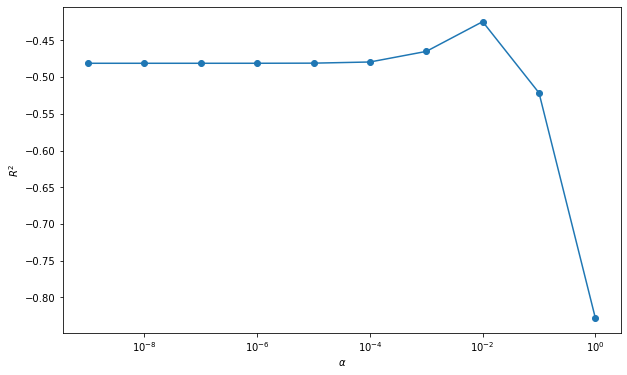

In [82]:
plt.figure(figsize=(10,6))
plt.semilogx(alphas, scores, '-o')
plt.xlabel('$\\alpha$')
plt.ylabel('$R^2$');

In [83]:
pf = PolynomialFeatures(degree=3)
scores = []
alphas = np.geomspace(0.001, 10, 5)
for alpha in alphas:
  las = Lasso(alpha=alpha, max_iter=100000)

  estimator = Pipeline([('make_higher_degree', pf),
                        ('scaler', s),
                        ('lasso_regression', las)])
  
  predictions = cross_val_predict(estimator, X_data, y_data, cv=kf)
  
  score = r2_score(y_data, predictions)

  scores.append(score)


C:\Users\Admin\anaconda33\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent(
C:\Users\Admin\anaconda33\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent(
C:\Users\Admin\anaconda33\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent(
C:\Users\Admin\anaconda33\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteratio

In [84]:
alphas

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])

In [85]:
scores

[-0.5050063595121919,
 -0.3657355585266935,
 -0.38911091257099595,
 -0.8283752320751314,
 -0.8283752320751314]

In [86]:
from sklearn.model_selection import GridSearchCV

estimator = Pipeline([('polynomial_features', PolynomialFeatures()),
                      ('scaler', StandardScaler()),
                      ('ridge_regression', Ridge())])

params = {'polynomial_features__degree': [1, 2, 3],
          'ridge_regression__alpha': np.geomspace(4, 20, 30)}

grid = GridSearchCV(estimator, params, cv=kf)

In [87]:
grid.fit(X_data,y_data)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('polynomial_features',
                                        PolynomialFeatures()),
                                       ('scaler', StandardScaler()),
                                       ('ridge_regression', Ridge())]),
             param_grid={'polynomial_features__degree': [1, 2, 3],
                         'ridge_regression__alpha': array([ 4.        ,  4.22826702,  4.46956049,  4.7246238 ,  4.99424274,
        5.27924796,  5.58051751,  5.89897953,  6.23561514,  6.59146146,
        6.96761476,  7.36523392,  7.78554391,  8.22983963,  8.69948987,
        9.19594151,  9.72072404, 10.27545421, 10.86184103, 11.48169104,
       12.13691388, 12.82952815, 13.56166768, 14.33558803, 15.15367351,
       16.01844446, 16.93256509, 17.89885162, 18.92028098, 20.        ])})

In [88]:
grid.best_score_, grid.best_params_

(-0.9885057471264375,
 {'polynomial_features__degree': 1, 'ridge_regression__alpha': 4.0})

In [89]:
y_predict = grid.predict(X_data)

In [90]:
r2_score(y_data, y_predict)

0.8973245536578361

In [91]:
grid.best_estimator_.named_steps['ridge_regression'].coef_

array([ 0.        , -0.18232622, -0.18232622,  0.0010353 , -0.00758529,
        0.00169928,  0.0034716 ,  0.18228277, -0.41403442, -0.00611725,
        0.00443967, -0.00620139,  0.00061865])

In [92]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_polynomial_features__degree,param_ridge_regression__alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004654,9.411110e-04,0.001662,4.701347e-04,1,4,"{'polynomial_features__degree': 1, 'ridge_regr...",0.0,0.0,-2.965517,-0.988506,1.397958,1
1,0.003657,4.700779e-04,0.001330,4.701903e-04,1,4.22827,"{'polynomial_features__degree': 1, 'ridge_regr...",0.0,0.0,-2.965517,-0.988506,1.397958,1
2,0.002992,1.123916e-07,0.001662,4.697969e-04,1,4.46956,"{'polynomial_features__degree': 1, 'ridge_regr...",0.0,0.0,-2.965517,-0.988506,1.397958,1
3,0.003325,4.700217e-04,0.001330,4.698531e-04,1,4.72462,"{'polynomial_features__degree': 1, 'ridge_regr...",0.0,0.0,-2.965517,-0.988506,1.397958,1
4,0.003325,4.700779e-04,0.001330,4.699655e-04,1,4.99424,"{'polynomial_features__degree': 1, 'ridge_regr...",0.0,0.0,-2.965517,-0.988506,1.397958,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.004978,1.152384e-05,0.001994,1.123916e-07,3,16.0184,"{'polynomial_features__degree': 3, 'ridge_regr...",0.0,0.0,-2.965517,-0.988506,1.397958,1
86,0.004987,2.247832e-07,0.001994,1.946680e-07,3,16.9326,"{'polynomial_features__degree': 3, 'ridge_regr...",0.0,0.0,-2.965517,-0.988506,1.397958,1
87,0.005652,9.412234e-04,0.001994,3.371748e-07,3,17.8989,"{'polynomial_features__degree': 3, 'ridge_regr...",0.0,0.0,-2.965517,-0.988506,1.397958,1
88,0.006650,4.710899e-04,0.002322,4.636157e-04,3,18.9203,"{'polynomial_features__degree': 3, 'ridge_regr...",0.0,0.0,-2.965517,-0.988506,1.397958,1


this model is for prediction

so in this lines of code i figured that the normal linear regression with no ploynomialfeatures had the best outcome then rigge 
that we used grid search to find the best parameters 


i had some problems with lasso and using pipeline in the model

for the next step if the model gets more complex we will need more tools and other forms to predict out data

# classification


# logestic regression 

In [93]:
data_ohc

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,age,Gender,dayofweek,weekend,education_Bechalor,education_High School or Below,education_Master or Above,education_college
0,0,0,1,1000,30,45,0,3,0,0.0,1.0,0.0,0.0
1,2,2,1,1000,30,33,1,3,0,1.0,0.0,0.0,0.0
2,3,3,1,1000,15,27,0,3,0,0.0,0.0,0.0,1.0
3,4,4,1,1000,30,28,1,4,1,0.0,0.0,0.0,1.0
4,6,6,1,1000,30,29,0,4,1,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,394,394,0,800,15,32,0,6,1,0.0,1.0,0.0,0.0
342,395,395,0,1000,30,25,0,6,1,0.0,1.0,0.0,0.0
343,397,397,0,800,15,39,0,0,0,0.0,0.0,0.0,1.0
344,398,398,0,1000,30,28,0,0,0,0.0,0.0,0.0,1.0


In [113]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear').fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

In [114]:
from sklearn.linear_model import LogisticRegressionCV

lr_l1 = LogisticRegressionCV(Cs=10,cv=4,penalty='l1',solver='liblinear').fit(X_train,y_train)
y_pred_lr1 = lr_l1.predict(X_test)

In [115]:
lr_l2 = LogisticRegressionCV(Cs=10,cv=4,penalty='l2',solver='liblinear').fit(X_train,y_train)
y_pred_lr2 = lr_l2.predict(X_test)

In [116]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
def measure_error(y_true,y_pred,label):
    return pd.Series({'accuracy':accuracy_score(y_true,y_pred),
                     'precision':precision_score(y_true,y_pred),
                     'recall_score':recall_score(y_true,y_pred),
                     'f1_score':f1_score(y_true,y_pred)},
                    name=label)

In [120]:
error_lr = measure_error(y_test,y_pred_lr,'lr')
error_lr

accuracy        0.980769
precision       0.976190
recall_score    1.000000
f1_score        0.987952
Name: lr1, dtype: float64

In [122]:
error_lr_l1 = measure_error(y_test,y_pred_lr1,'lr1')
error_lr_l1

accuracy        1.0
precision       1.0
recall_score    1.0
f1_score        1.0
Name: lr1, dtype: float64

In [123]:
error_lr_l2 = measure_error(y_test,y_pred_lr2,'lr2')
error_lr_l2

accuracy        0.980769
precision       0.976190
recall_score    1.000000
f1_score        0.987952
Name: lr2, dtype: float64

we see that we get perfect result in lr_l1

# KNN

In [149]:
from sklearn.preprocessing import MinMaxScaler

Mm =MinMaxScaler()


In [150]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()

max_k=40
f1_scores=list()
error_rates=list()
for k in range (1,max_k):
    knn = KNeighborsClassifier(n_neighbors=k, weights= 'distance')
    knn = knn.fit(X_train,y_train)
    
    y_pred = knn.predict(X_test)
    f1=f1_score(y_pred, y_test)
    f1_scores.append((k,round(f1_score(y_test,y_pred))))
    
    error = 1-round(accuracy_score(y_test,y_pred))
    error_rates.append((k,error))
    
f1_results=pd.DataFrame(f1_scores, columns=['K','F1 score'])
error_results =pd.DataFrame(error_rates, columns =['K','error Rate'])

<Figure size 1800x1200 with 0 Axes>

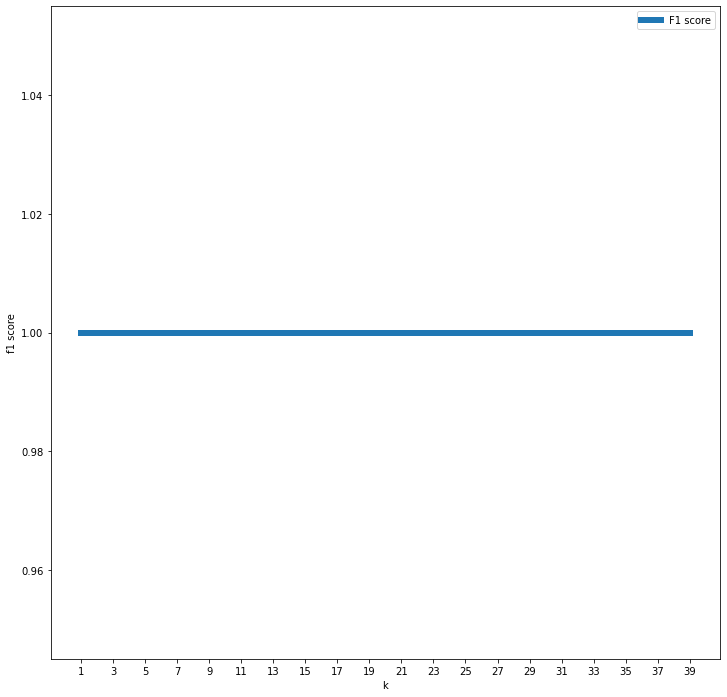

In [151]:
plt.figure(dpi=300)
ax = f1_results.set_index('K').plot( figsize=(12,12),linewidth=6)
ax.set(xlabel='k',ylabel='f1 score')
ax.set_xticks(range(1,max_k,2))
plt.savefig('knn_f1.png')

its strange but we dont get any change with changing k in knn

# Decision Tree

In [154]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt=dt.fit(X_train,y_train)

In [155]:
dt.tree_.node_count , dt.tree_.max_depth

(3, 1)

In [156]:
y_train_pred=dt.predict(X_train)
y_test_pred=dt.predict(X_test)

train_test_split_fullerrror = pd.concat([measure_error(y_train,y_train_pred,'train'),
                                        measure_error(y_test,y_test_pred,'test')],axis=1)

train_test_split_fullerrror

,train,test
accuracy,1.0,1.0
precision,1.0,1.0
recall_score,1.0,1.0
f1_score,1.0,1.0


after trying these models i can say decision tree and logestic regression with l1 are the best models

my summary key findings was that classification has many soloutions to learn from 

for the next step we have to go to deeplearning and slove more complicated problems 